In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\KPI_Exp.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,PDC,gap%,Day,Profit
0,0,2019-02-15,10780.25,10785.75,10620.40,10724.40,521876968,NaN,NaN,Friday,NaN
1,1,2019-02-18,10738.65,10759.90,10628.40,10640.95,345440240,10724.40,0.132875,Monday,26810.0
2,2,2019-02-19,10636.70,10722.85,10585.65,10604.35,291507060,10640.95,-0.039940,Tuesday,7990.0
3,3,2019-02-20,10655.45,10752.70,10646.40,10735.45,289195306,10604.35,0.481878,Wednesday,-28320.0
4,4,2019-02-21,10744.10,10808.85,10721.50,10789.85,279584955,10735.45,0.080574,Thursday,52385.0


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,PDC,gap%,Day,Profit
0,2019-02-15,10780.25,10785.75,10620.40,10724.40,521876968,NaN,NaN,Friday,NaN
1,2019-02-18,10738.65,10759.90,10628.40,10640.95,345440240,10724.40,0.132875,Monday,26810.0
2,2019-02-19,10636.70,10722.85,10585.65,10604.35,291507060,10640.95,-0.039940,Tuesday,7990.0
3,2019-02-20,10655.45,10752.70,10646.40,10735.45,289195306,10604.35,0.481878,Wednesday,-28320.0
4,2019-02-21,10744.10,10808.85,10721.50,10789.85,279584955,10735.45,0.080574,Thursday,52385.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    795 non-null    object 
 1   Open    795 non-null    float64
 2   High    795 non-null    float64
 3   Low     795 non-null    float64
 4   Close   795 non-null    float64
 5   Volume  795 non-null    int64  
 6   PDC     794 non-null    float64
 7   gap%    794 non-null    float64
 8   Day     795 non-null    object 
 9   Profit  635 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 62.2+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df = df.set_index(['Date'])

In [9]:
df.head()

,Open,High,Low,Close,Volume,PDC,gap%,Day,Profit
Date,,,,,,,,,
2019-02-15,10780.25,10785.75,10620.40,10724.40,521876968,NaN,NaN,Friday,NaN
2019-02-18,10738.65,10759.90,10628.40,10640.95,345440240,10724.40,0.132875,Monday,26810.0
2019-02-19,10636.70,10722.85,10585.65,10604.35,291507060,10640.95,-0.039940,Tuesday,7990.0
2019-02-20,10655.45,10752.70,10646.40,10735.45,289195306,10604.35,0.481878,Wednesday,-28320.0
2019-02-21,10744.10,10808.85,10721.50,10789.85,279584955,10735.45,0.080574,Thursday,52385.0


In [10]:
df.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
PDC         1
gap%        1
Day         0
Profit    160
dtype: int64

In [11]:
df['Profit'] = df['Profit'].fillna(0)
df['PDC'] = df['PDC'].fillna(0)
df['gap%'] = df['gap%'].fillna(0)

In [12]:
df.head()

,Open,High,Low,Close,Volume,PDC,gap%,Day,Profit
Date,,,,,,,,,
2019-02-15,10780.25,10785.75,10620.40,10724.40,521876968,0.00,0.000000,Friday,0.0
2019-02-18,10738.65,10759.90,10628.40,10640.95,345440240,10724.40,0.132875,Monday,26810.0
2019-02-19,10636.70,10722.85,10585.65,10604.35,291507060,10640.95,-0.039940,Tuesday,7990.0
2019-02-20,10655.45,10752.70,10646.40,10735.45,289195306,10604.35,0.481878,Wednesday,-28320.0
2019-02-21,10744.10,10808.85,10721.50,10789.85,279584955,10735.45,0.080574,Thursday,52385.0


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Day'] = le.fit_transform(df['Day'])

<AxesSubplot:xlabel='Day', ylabel='Profit'>

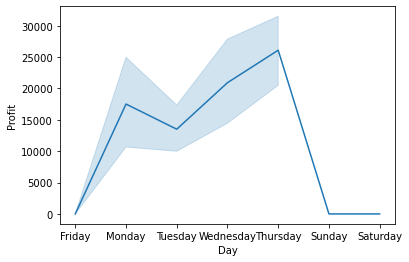

In [13]:
sns.lineplot(df['Day'],df['Profit'])

Text(0, 0.5, 'Profit')

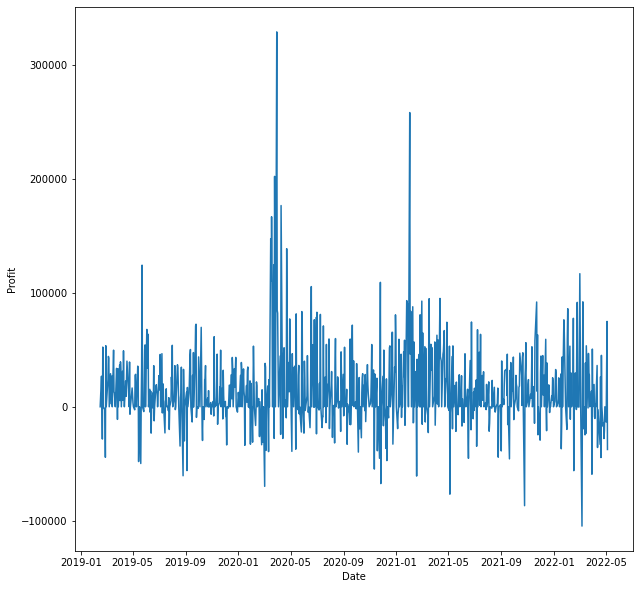

In [14]:
plt.figure(figsize=(10,10))
ts = df['Profit']
plt.plot(ts)
plt.xlabel('Date')
plt.ylabel('Profit')

In [15]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=52,center=False).mean()
    rolstd = timeseries.rolling(window=52,center=False).std()
    # plot the graph
    orig = plt.plot(timeseries,color='b',label = 'Original')
    mean = plt.plot(rolmean,color='red',label='Rolling mean')
    std = plt.plot(rolstd,color='black',label='Rolling std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    print('Results of Dickey Fuller test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

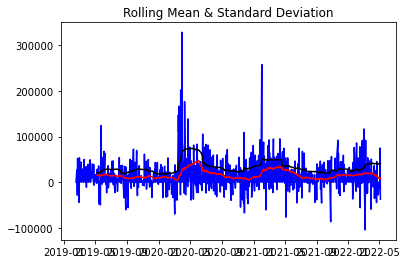

Results of Dickey Fuller test
Test Statistic                -6.562720e+00
p-value                        8.303689e-09
#Lags Used                     1.100000e+01
Number of Observations Used    7.830000e+02
Critical Value (1%)           -3.438729e+00
Critical Value (5%)           -2.865238e+00
Critical Value (10%)          -2.568739e+00
dtype: float64


In [16]:
test_stationarity(ts)

Text(0.5, 1.0, 'ACF PLOT')

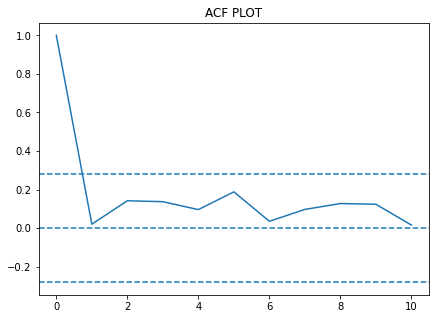

In [40]:
#acf gives the value of 'p'
plt.figure(figsize=(7,5))
plt.plot(range(0,11),acf(ts , nlags=10))
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-7.96/np.sqrt(len(ts)),linestyle='--')
plt.axhline(y=7.96/np.sqrt(len(ts)),linestyle='--')
plt.title('ACF PLOT')

Text(0.5, 1.0, 'PACF PLOT')

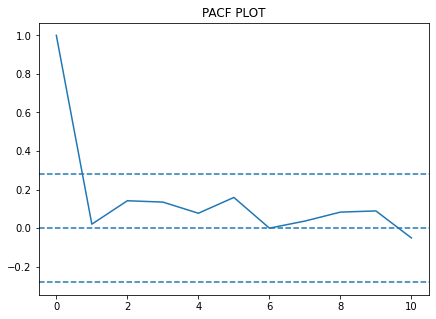

In [43]:
# pacf values is 'q'
plt.figure(figsize=(7,5))
plt.plot(range(0,11),pacf(ts , nlags=10))
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-7.96/np.sqrt(len(ts)),linestyle='--')
plt.axhline(y=7.96/np.sqrt(len(ts)),linestyle='--')
plt.title('PACF PLOT')

In [19]:
from statsmodels.tsa.arima_model import ARIMA,ARMA

In [20]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Profit')

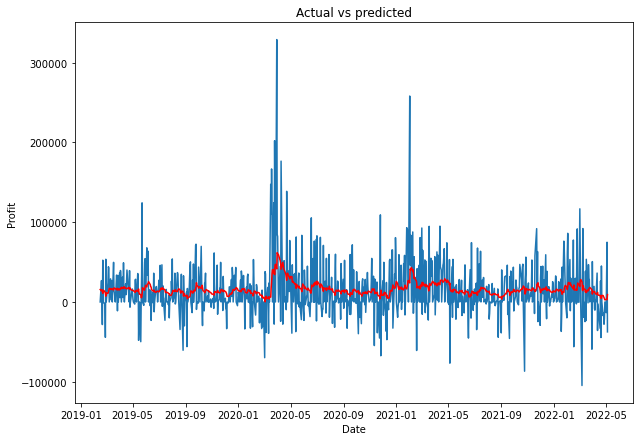

In [21]:
plt.figure(figsize=(10,7))
model = ARMA(ts,order=(1,1)).fit()
plt.title('Actual vs predicted')
plt.plot(ts) # actual value
plt.plot(model.fittedvalues,color='r') # predicted values
plt.xlabel('Date')
plt.ylabel('Profit')

In [32]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df['Profit'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

<AxesSubplot:xlabel='Date'>

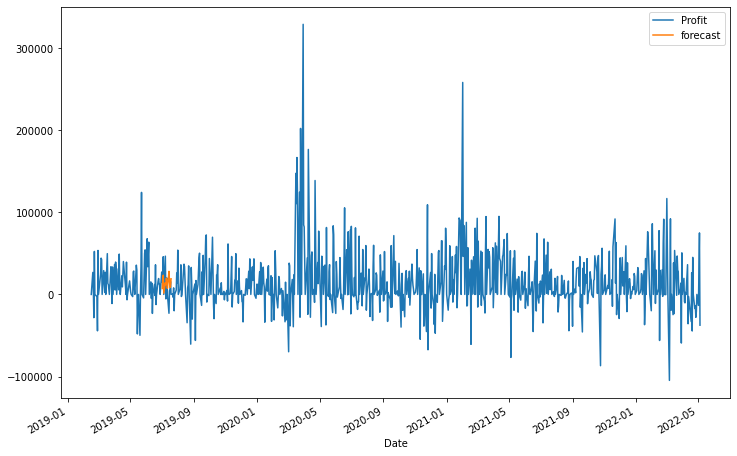

In [39]:
df['forecast'] = results.predict(start=90, end=103, dynamic=True)
df[['Profit','forecast']].plot(figsize=(12,8))

#### This blue color is your actual data distribution
#### Orange color represent your future values pattern